# Εφαρμογή 1

In [32]:
import sympy as sym
from sympy import Matrix

from IPython.display import Image, HTML, display

## Ορισμός των συμβόλων που θα χρησιμοποιηθούν στην επίλυση του προβλήματος

In [33]:
A, E, I, L = sym.symbols('A E I L')
U1, U2, U3, U4, U5, U6 = sym.symbols('U1 U2 U3 U4 U5 U6')
P1, P2, P3, P4, P5, P6 = sym.symbols('P1 P2 P3 P4 P5 P6')
R1, R2, R3, R4, R5, R6 = sym.symbols('R1 R2 R3 R4 R5 R6')

## Καθορισμός μητρώων και διανυσμάτων

### Μητρώο στιβαρότητας

In [34]:
K = Matrix([[A*E/L, 0, 0, -A*E/L, 0, 0],
        [0, 12*E*I/L**3, 6*E*I/L**2, 0, -12*E*I/L**3, 6*E*I/L**2],
        [0, 6*E*I/L**2, 4*E*I/L, 0, -6*E*I/L**2, 2*E*I/L],
        [-A*E/L, 0, 0, A*E/L, 0, 0],
        [0, -12*E*I/L**3, -6*E*I/L**2, 0, 12*E*I/L**3, -6*E*I/L**2],
        [0, 6*E*I/L**2, 2*E*I/L, 0, -6*E*I/L**2, 4*E*I/L]])

K

Matrix([
[ A*E/L,            0,           0, -A*E/L,            0,           0],
[     0,  12*E*I/L**3,  6*E*I/L**2,      0, -12*E*I/L**3,  6*E*I/L**2],
[     0,   6*E*I/L**2,     4*E*I/L,      0,  -6*E*I/L**2,     2*E*I/L],
[-A*E/L,            0,           0,  A*E/L,            0,           0],
[     0, -12*E*I/L**3, -6*E*I/L**2,      0,  12*E*I/L**3, -6*E*I/L**2],
[     0,   6*E*I/L**2,     2*E*I/L,      0,  -6*E*I/L**2,     4*E*I/L]])

### Μητρώο παραμορφώσεων

In [35]:
U = Matrix([[U1], [U2], [U3], [U4], [U5], [U6]])
U

Matrix([
[U1],
[U2],
[U3],
[U4],
[U5],
[U6]])

### Μητρώο δυνάμεων

In [36]:
P = Matrix([[P1], [P2], [P3], [P4], [P5], [P6]])
P

Matrix([
[P1],
[P2],
[P3],
[P4],
[P5],
[P6]])

### Μητρώο αντιδράσεων

In [37]:
R = Matrix([[R1], [R2], [R3], [R4], [R5], [R6]])
R

Matrix([
[R1],
[R2],
[R3],
[R4],
[R5],
[R6]])

## Παράδειγμα 1 - Επίλυση προβόλου

In [38]:
image_path1 = 'https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example1/ekfonisi_1.png'
image_path2 = 'https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example1/ekfonisi_2.png'

HTML(f"""
    <div class="row">
            <img src={image_path1} style="width:100"> </img>
            <img src={image_path2} style="width:80"> </img>
    </div>
    """)

### Υπολογισμός παραμέτρων παραδείγματος

In [39]:
A_example = 0.3*0.4             # m^2
I_example = 0.3*0.4**3/12       # m^4
E_example = 1.0e10              # Pa
L_example = 8.0                 # m
q_example = 20_000.0            # N/m

print(f'A = {A_example:.4f} m^2')
print(f'I = {I_example:.6f} m^4')

A = 0.1200 m^2
I = 0.001600 m^4


### Αντικατάσταση τιμών στο μητρώο στιβαρότητας

In [40]:
k_example = K.subs(A, A_example).subs(E, E_example).subs(I, I_example).subs(L, L_example)
k_example

Matrix([
[ 150000000.0,         0,          0, -150000000.0,          0,          0],
[           0,  375000.0,  1500000.0,            0,  -375000.0,  1500000.0],
[           0, 1500000.0,  8000000.0,            0, -1500000.0,  4000000.0],
[-150000000.0,         0,          0,  150000000.0,          0,          0],
[           0, -375000.0, -1500000.0,            0,   375000.0, -1500000.0],
[           0, 1500000.0,  4000000.0,            0, -1500000.0,  8000000.0]])

### Αντικατάσταση τιμών στο μητρώο δυνάμεων

Θεωρώντας αμφίπακτη δοκό, οι τιμές των δυνάμεων στα άκρα είναι σύμφωνα με το σχήμα:

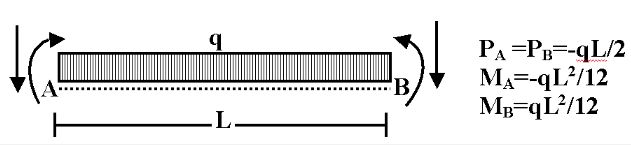

In [41]:
Image('https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example1/uniform.png', width=600)

In [42]:
PA_example = PB_example = - q_example * L_example / 2
MA_example = - q_example * L_example**2 / 12
MB_example = -MA_example
p_example = P.subs(P1, 0).subs(P2, PA_example).subs(P3, MA_example).subs(P4, 0).subs(P5, PB_example).subs(P6, MB_example)
p_example

Matrix([
[                0],
[         -80000.0],
[-106666.666666667],
[                0],
[         -80000.0],
[ 106666.666666667]])

## Υπολογισμός των παραμορφώσεων και των αντιδράσεων

Στόχος είναι η επίλυση της μητρωικής εξίσωσης:

$ [k] \cdot [u] = [P] + [R]$

στην οποία όμως υπάρχουν 2 άγνωστοι, οι πίνακες $[u]$ και $[R]$.

Επιπλέον, παρατηρείται ότι το μητρώο στιβαρότητας δεν μπορεί να αντιστραφεί καθώς η ορίζουσά του είναι μεδενική.

In [43]:
# Υπολογισμός ορίζουσας του μητρώου στιβαρότητας
k_example.det()

0

### Αντικατάσταση γνωστών τιμών στα μητρώα αντιδράσεων και παραμορφώσεων

Στο μητρώο αντιδράσεων, οι αντιδράσεις στην άκρη του προβόλου θα είναι μηδενικές, ενώ αντίστοιχα, στο μητρώο παραμορφώσεων οι παραμορφώσεις στην πάκτωση θα είναι μηδενικές.

In [44]:
R1_example, R2_example, R3_example = sym.symbols('R1_example R2_example R3_example')
r_example = R.subs(R1, R1_example).subs(R2, R2_example).subs(R3, R3_example).subs(R4, 0).subs(R5, 0).subs(R6, 0)
r_example

Matrix([
[R1_example],
[R2_example],
[R3_example],
[         0],
[         0],
[         0]])

In [45]:
U4_example, U5_example, U6_example = sym.symbols('U4_example U5_example U6_example')
u_example = U.subs(U1, 0).subs(U2, 0).subs(U3, 0).subs(U4, U4_example).subs(U5, U5_example).subs(U6, U6_example)
u_example

Matrix([
[         0],
[         0],
[         0],
[U4_example],
[U5_example],
[U6_example]])

### Διαχωρισμός σε υπομητρώα

Παρατηρείται ότι αν θεωρηθεί το υπομητρώο με τα τελευταία 3 στοιχεία των πινάκων $[k]$, $[P]$, $[R]$ και $[u]$, τότε η μητρωική εξίσωση γίνεται:

$ [k_{456}] \cdot [u_{456}] = [P_{456}] + [R_{456}]$

όπου μάλιστα το $[R_{456}]$ είναι μηδενικό.

In [46]:
k_456 = Matrix(k_example[3:, 3:])
p_456 = Matrix(p_example[3:])
r_456 = Matrix(r_example[3:])
u_456 = Matrix(u_example[3:])


In [47]:
k_456

Matrix([
[150000000.0,          0,          0],
[          0,   375000.0, -1500000.0],
[          0, -1500000.0,  8000000.0]])

In [48]:
r_456

Matrix([
[0],
[0],
[0]])

In [49]:
u_456

Matrix([
[U4_example],
[U5_example],
[U6_example]])

In [50]:
p_456

Matrix([
[               0],
[        -80000.0],
[106666.666666667]])

Από τον πολλαπλασιασμό των $ [k_{456}] \cdot [u_{456}]$ και την εξίσωση του γινομένου με το $[P_{456}]$ προκύπτει ένα σύστημα 3x3 εξισώσεων, όπου φυσικά $U_4=0 $ οπότε καταλήγουμε σε σύστημα 2x2

In [51]:
k_456 * u_456

Matrix([
[                      150000000.0*U4_example],
[  375000.0*U5_example - 1500000.0*U6_example],
[-1500000.0*U5_example + 8000000.0*U6_example]])

Από τη λύση του συστήματος προκύπτουν οι τιμές των παραμορφώσεων $U_5$ και $U_6$.

### Εναλλακτική επίλυση με πράξεις μητρώων


Η εξίσωση:

$ [k_{456}] \cdot [u_{456}] = [P_{456}] + [R_{456}]$

για μηδενικό $[R_{456}]$ μπορεί να γραφτεί και ως:

$ [k_{456}] \cdot [u_{456}] = [P_{456}]$

οπότε 

$ [k_{456}]^{-1}[k_{456}] \cdot [u_{456}] = [k_{456}]^{-1} \cdot [P_{456}]$

$ [u_{456}] = [k_{456}]^{-1} \cdot [P_{456}]$

Το μητρώο $[k_{456}]$ είναι πλέον αντιστρέψιμο

In [52]:
# Το αντίστροφο του μητρώου στιβαρότητας για τα στοιχεία 456
k_456.inv()

Matrix([
[6.66666666666667e-9,                   0,      0],
[                  0, 1.06666666666667e-5, 2.0e-6],
[                  0,              2.0e-6, 5.0e-7]])

In [53]:
u_456_solution = Matrix(k_456.inv() * p_456)
u_456_solution

Matrix([
[                 0],
[             -0.64],
[-0.106666666666667]])

Το παραπάνω αποτέλεσμα είναι οι τιμές του μητρώου $[u_{456}]$, άρα των παραμορφώσεων $U_4$, $U_5$ και $U_6$.

οπότε πλέον το οι τιμές των U4, U5 και U6 της λύσης μπορούν να αντιστοιχηθούν στις σχετικές μεταβλητές

In [54]:
u_solution = u_example.subs(U4_example, u_456_solution[0]).subs(U5_example, u_456_solution[1]).subs(U6_example, u_456_solution[2])
u_example = u_solution
u_example

Matrix([
[                 0],
[                 0],
[                 0],
[                 0],
[             -0.64],
[-0.106666666666667]])

Η αρχική μητρωική εξίσωση έχει πλέον ως μόνο άγνωστο το μητρώο [R]:

$ [k] \cdot [u] = [P] + [R]$

οπότε:

$[R] = [k] \cdot [u] - [P]$

In [55]:
r_solution = Matrix(k_example * u_example - p_example)
r_solution


Matrix([
[                    0],
[             160000.0],
[             640000.0],
[                    0],
[-2.91038304567337e-11],
[ 7.27595761418343e-11]])

Παρατηρείται ότι στο αποτέλεσμα που προκύπτει υπολογιστικά εμφανίζονται "λύσεις" για τις αντιδράσεις $R_5$ και $R_6$ που θα έπρεπε να είναι μηδενικές.

Αυτό σχετίζεται με τους υπολογισμούς που γίνονται με τους Η/Υ και τους τρόπους που αποθηκεύονται οι πραγματικές τιμές των μεταβλητών. Βλέπουμε ότι τα νούμερα είναι πάρα πολύ μικρά, πρακτικά ίσα με μηδέν, ωστόσο οι υπολογιστές δεν τα αποδεχόνται ως τέτοια. Αυτό μπορεί να επηρεάσει την ακρίβεια των υπολογισμών, ιδιαίτερα σε περίπτωση που οι κάποιες μεταβλητές έχουν πολύ μεγάλες τιμές ενώ κάποιες άλλες πολύ μικρότερες. Βέβαια στο παράδειγμα που εξετάζεται οι τιμές των μεταβλητών είναι τέτοιες ώστε οι υπολογισμοί είναι πρακτικά ακριβείς.